In [3]:
import pandas as pd
import numpy as np

In [4]:
movies = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\movies.csv")  # If it's in a folder named data
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
rating = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\ratings.csv")
rating.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [6]:
tags = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\tags.csv")
tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [7]:
links = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\links.csv")
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [11]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [12]:
rating.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [13]:
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [34]:
rating['rating'].value_counts().sort_index()

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

In [35]:
movies['genres'].value_counts().head(10)

genres
Drama                   1053
Comedy                   946
Comedy|Drama             435
Comedy|Romance           363
Drama|Romance            349
Documentary              339
Comedy|Drama|Romance     276
Drama|Thriller           168
Horror                   167
Horror|Thriller          135
Name: count, dtype: int64

In [14]:
top_10_movies = movies['title'].value_counts().head(10).index
top_10_movies

Index(['Saturn 3 (1980)', 'Confessions of a Dangerous Mind (2002)',
       'Emma (1996)', 'Eros (2004)', 'War of the Worlds (2005)',
       'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)',
       'Tom Segura: Disgraceful (2018)', 'Mortal Kombat (1995)'],
      dtype='object', name='title')

In [39]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [38]:
# Calculate sparsity
# Sparsity = 1 - (number of ratings / (number of users * number of movies))

# number of unique users
n_users = rating['userId'].nunique()

# number of unique movies
n_movies = rating['movieId'].nunique()

# number of ratings
n_ratings = len(rating)

sparsity = 1 - (n_ratings / (n_users * n_movies))
print(f"Users: {n_users}, Movies: {n_movies}, Sparsity: {sparsity:.2%}")

Users: 610, Movies: 9724, Sparsity: 98.30%


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_13156\2153726955.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  top_10_barplot = sns.barplot(x=movies['title'].value_counts().head(10).values, y=top_10_movies, palette='deep')


Text(0.5, 1.0, 'Top 10 Movies')

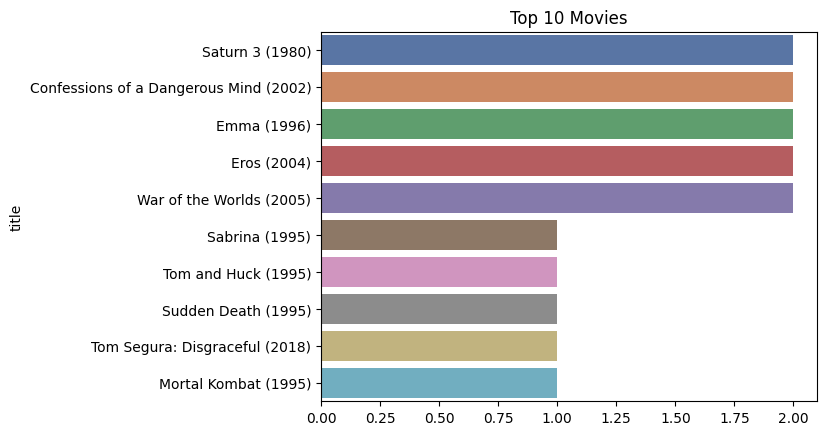

In [37]:
top_10_barplot = sns.barplot(x=movies['title'].value_counts().head(10).values, y=top_10_movies, palette='deep')
top_10_barplot.set_title('Top 10 Movies')

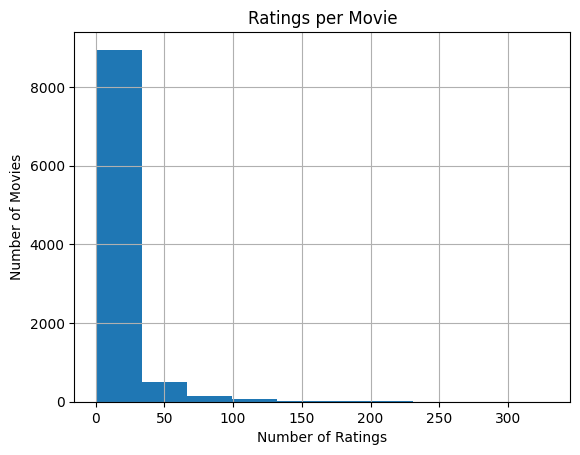

In [40]:
ratings_per_movie = rating['movieId'].value_counts()
ratings_per_movie.hist(bins=10)
plt.title('Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()  


<Axes: xlabel='rating', ylabel='Count'>

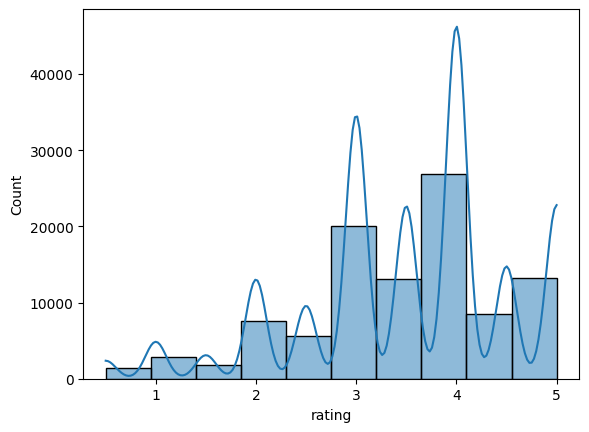

In [41]:
sns.histplot(rating['rating'], bins=10, kde=True)
